In [1]:
from urllib.request import urlretrieve
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, './data/italy-covid-daywise.csv')

('./data/italy-covid-daywise.csv', <http.client.HTTPMessage at 0x2b8c1a7f760>)

In [3]:
import pandas as pd
covid_df = pd.read_csv('./data/italy-covid-daywise.csv')

In [4]:
type(covid_df)

pandas.core.frame.DataFrame

In [5]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
covid_df.shape

(248, 4)

A dataframe can be cosidered to be a dictionary of lists, with key value pairs, with each key being equal to a column name and the value being a list containing the values  of that given column. NOte, how we try to access values of a particular column using dictionary notation here. The objetc we get back is not a list though. It is a series.

In [9]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [10]:
type(covid_df['new_cases'])

pandas.core.series.Series

In [11]:
covid_df['new_cases'][243]

1444.0

we can also use .at function to get the values at the specific rows and columns.

In [12]:
covid_df.at[243,'new_cases']

1444.0

In [13]:
# Easier method to access columns

covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [14]:
type(covid_df.new_cases)

pandas.core.series.Series

In [15]:
# Selecting a subset of columns - pass a list of columns you need

covid_df[['new_cases','new_tests']]

,new_cases,new_tests
0,0.0,NaN
1,0.0,NaN
2,0.0,NaN
3,0.0,NaN
4,0.0,NaN
...,...,...
243,1444.0,53541.0
244,1365.0,42583.0
245,996.0,54395.0
246,975.0,NaN


### VERY IMPORTANT

covid_df_copy = covid_df <- NO new copy is created, ie. all hanges in covid_df_copy will appear in covid_df as well.

covid_df_copy = covid_df.copy() <- covid_df_copy is completely separate from covid_df. Changes in one will not affect the other.


In [16]:
# Indexing otation to access a particular row.

covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [17]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [18]:
covid_df.tail(5)

,date,new_cases,new_deaths,new_tests
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [19]:
covid_df.new_tests.first_valid_index()

111

In [20]:
covid_df.sample(5)

,date,new_cases,new_deaths,new_tests
213,2020-07-31,382.0,3.0,29686.0
45,2020-02-14,0.0,0.0,NaN
200,2020-07-18,231.0,11.0,27569.0
22,2020-01-22,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN


In [21]:
# Getting the total number of cases
covid_df.new_cases.sum()

271515.0

In [22]:
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()
print(death_rate)

0.13073679170579894


### Querying and Sorting Rows

In [24]:
high_new_cases = covid_df.new_cases > 1000

In [39]:
#Another way of indexing. Those that are positive are used
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [40]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [41]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [46]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
positive_rate = total_cases / total_tests

In [47]:
positive_rate

0.05206657403227681

In [50]:
high_ratio_df = covid_df[covid_df.new_cases/covid_df.new_tests > positive_rate]

In [51]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [52]:
covid_df['positive_rate']= covid_df.new_cases/covid_df.new_tests

In [53]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [54]:
help(covid_df.drop)

Help on method drop in module pandas.core.frame:

drop(labels=None, axis: 'Axis' = 0, index=None, columns=None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'str' = 'raise') method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index : single label or list-like
        Alternative to specifying axis (``labels, axis=0``
        is equiv

In [55]:
covid_df.drop(columns=['positive_rate'],inplace=True)

In [58]:
# Get the 10 highest rows with new cases
covid_df.sort_values('new_cases',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


For sort_values, the by column can either have one value or more and the ascending can either have one value or a list of True/False values.

In [59]:
covid_df.sort_values('new_deaths',ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


In [60]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [61]:
type(covid_df.date)

pandas.core.series.Series

In [62]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [63]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [67]:
covid_df['year']=pd.DatetimeIndex(covid_df.date).year
covid_df['month']=pd.DatetimeIndex(covid_df.date).month
covid_df['day']=pd.DatetimeIndex(covid_df.date).day
covid_df['weekday']=pd.DatetimeIndex(covid_df.date).weekday

In [68]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [69]:
covid_df_may = covid_df[covid_df.month == 5]
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [70]:
covid_df_may_mertics = covid_df_may[['new_cases','new_deaths','new_tests']]

In [71]:
covid_may_totals = covid_df_may_mertics.sum()

In [72]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [73]:
covid_df[covid_df.month == 5][['new_cases','new_deaths','new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [74]:
covid_df.new_cases.mean()

1094.8185483870968

In [75]:
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

### Grouping and Aggregation

In [76]:
monthly_groups = covid_df.groupby('month')

In [79]:
monthly_groups[['new_cases','new_deaths','new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [80]:
covid_df.groupby('month')[['new_cases','new_deaths','new_tests']].sum()

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


### Merging data from multiple sources

In [83]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv',             './data/locations.csv')
locations_df = pd.read_csv('./data/locations.csv')

In [84]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [86]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [87]:
covid_df['location'] = 'Italy'

In [88]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy


In [89]:
merged_df = covid_df.merge(locations_df,on='location')

In [90]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [91]:
merged_df['cases_per_million'] = merged_df.new_cases *1e6 /merged_df.population
merged_df['deaths_per_million'] = merged_df.new_deaths *1e6 /merged_df.population
merged_df['tests_per_million'] = merged_df.new_tests *1e6 /merged_df.population

In [92]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,Italy,Europe,60461828.0,83.51,3.18,35220.084,23.882837,0.016539,885.533927
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,Italy,Europe,60461828.0,83.51,3.18,35220.084,22.576228,0.066157,704.295609
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.473204,0.099236,899.658542
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,Italy,Europe,60461828.0,83.51,3.18,35220.084,16.125877,0.132315,NaN


In [96]:
result_df = merged_df[['date','new_cases','new_deaths','new_tests','cases_per_million','deaths_per_million','tests_per_million']]

In [98]:
result_df.to_csv('./data/results.csv',index=False)

### Basic Plotting with Pandas

<AxesSubplot:>

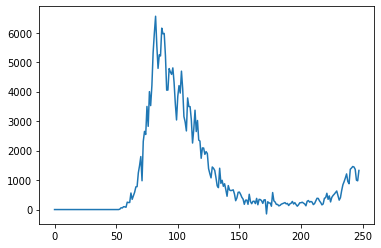

In [101]:
result_df.new_cases.plot()

In [102]:
result_df.set_index('date',inplace=True)

In [103]:
result_df

,new_cases,new_deaths,new_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,
2019-12-31,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...
2020-08-30,1444.0,1.0,53541.0,23.882837,0.016539,885.533927
2020-08-31,1365.0,4.0,42583.0,22.576228,0.066157,704.295609
2020-09-01,996.0,6.0,54395.0,16.473204,0.099236,899.658542


<AxesSubplot:xlabel='date'>

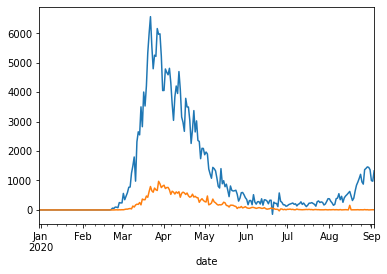

In [104]:
result_df.new_cases.plot()
result_df.new_deaths.plot()